In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

mpg.query('category in ["compact","suv"]').groupby('category', as_index=False).agg(n=('category','count'),mean=('cty','mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [6]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

#mpg.query('category in ["compact","suv"]').groupby('category', as_index=False).agg(n=('category','count'),mean=('cty','mean'))
compact=mpg.query('category=="compact"')['cty']
suv=mpg.query('category=="suv"')['cty']

from scipy import stats
stats.ttest_ind(compact,suv,equal_var=True)

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

In [7]:
eco = pd.read_csv('economics.csv')
#상관계수 구하기
eco[['unemploy','pce']].corr()

#유의확률 구하기
from scipy import stats
stats.pearsonr(eco['unemploy'], eco['pce'])

PearsonRResult(statistic=0.614517614193208, pvalue=6.7735273032917e-61)

<AxesSubplot: >

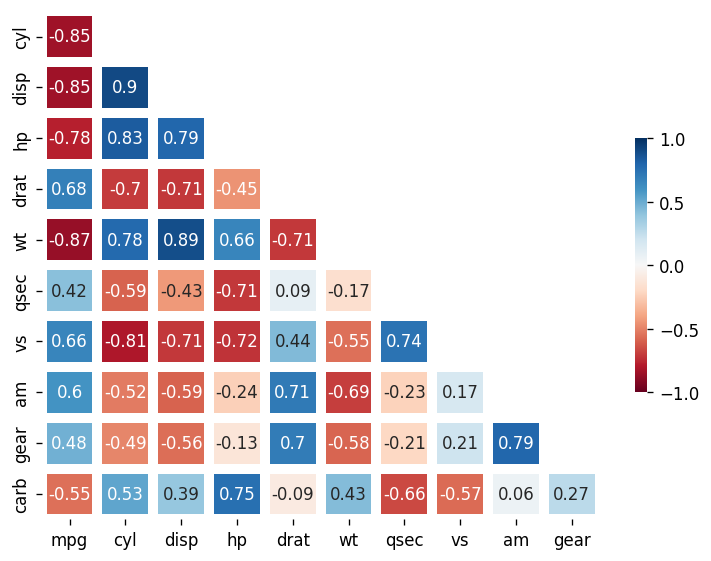

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mt= pd.read_csv('mtcars.csv')
#상관행렬 만들기
mt_cor=mt.corr()
#소수점 둘째 자리까지 반올림
mt_cor=round(mt_cor,2)

plt.rcParams.update({'figure.dpi':'120',
                     'figure.figsize':[7.5,5.5]})
mask=np.zeros_like(mt_cor)
mask[np.triu_indices_from(mask)]=1
mask=mask[1:,:-1]
mt_cor=mt_cor.iloc[1:,:-1]
sns.heatmap(mt_cor,annot=True,cmap='RdBu', mask=mask,linewidths=6,vmax=1,vmin=-1,cbar_kws={"shrink":.5})